## Figure 16 (Journal of Climate submission; Molina et al.)

You may also plot the mixed layer depth for these two seasons (pop output "HMXL" which is the monthly mean mixed layer depth) in the Nino34 region or the east equatorial Pacific.

**Figure by: Maria J. Molina, NCAR**

In [1]:
import xarray as xr
import numpy as np
from climatico import enso
from climatico.util import weighted_mean, pacific_lon
import matplotlib.pyplot as plt
import cftime
from datetime import timedelta
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon
import matplotlib.patches as mpatches

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for
data_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.HMXL.*.nc'
data_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.HMXL.*.nc'
data_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.HMXL.*.nc'
data_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.HMXL.*.nc'
data_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.HMXL.*.nc'
data_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.HMXL.*.nc'

In [4]:
def get_var(ds):
    return ds['HMXL'].to_dataset(name='HMXL')

In [5]:
nino = enso.DefineNino(nino='pacslab', cutoff=0.5, runningmean=3, lats='lat', lons='lon')

In [6]:
ds_g02sv = xr.open_mfdataset(f'{directory_data}{data_g02sv}', preprocess=nino.nino, combine='by_coords')
ds_g04sv = xr.open_mfdataset(f'{directory_data}{data_g04sv}', preprocess=nino.nino, combine='by_coords')
ds_p02sv = xr.open_mfdataset(f'{directory_data}{data_p02sv}', preprocess=nino.nino, combine='by_coords')
ds_p04sv = xr.open_mfdataset(f'{directory_data}{data_p04sv}', preprocess=nino.nino, combine='by_coords')
ds_psalt = xr.open_mfdataset(f'{directory_data}{data_psalt}', preprocess=nino.nino, combine='by_coords')
ds_cntrl = xr.open_mfdataset(f'{directory_data}{data_cntrl}', preprocess=nino.nino, combine='by_coords')

In [7]:
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))

In [8]:
ds_g02sv_jja = ds_g02sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='JJA')
ds_g04sv_jja = ds_g04sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='JJA')
ds_p02sv_jja = ds_p02sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='JJA')
ds_p04sv_jja = ds_p04sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='JJA')
ds_psalt_jja = ds_psalt['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(101, 1, 1),cftime.DatetimeNoLeap(251, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='JJA')
ds_cntrl_jja = ds_cntrl['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1),cftime.DatetimeNoLeap(1600, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='JJA')

In [9]:
ds_g02sv_djf = ds_g02sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='DJF')
ds_g04sv_djf = ds_g04sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='DJF')
ds_p02sv_djf = ds_p02sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='DJF')
ds_p04sv_djf = ds_p04sv['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='DJF')
ds_psalt_djf = ds_psalt['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(101, 1, 1),cftime.DatetimeNoLeap(251, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='DJF')
ds_cntrl_djf = ds_cntrl['HMXL'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1),cftime.DatetimeNoLeap(1600, 1, 1))).groupby(
    'time.season').mean('time',skipna=True).sel(season='DJF')

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/molina/m

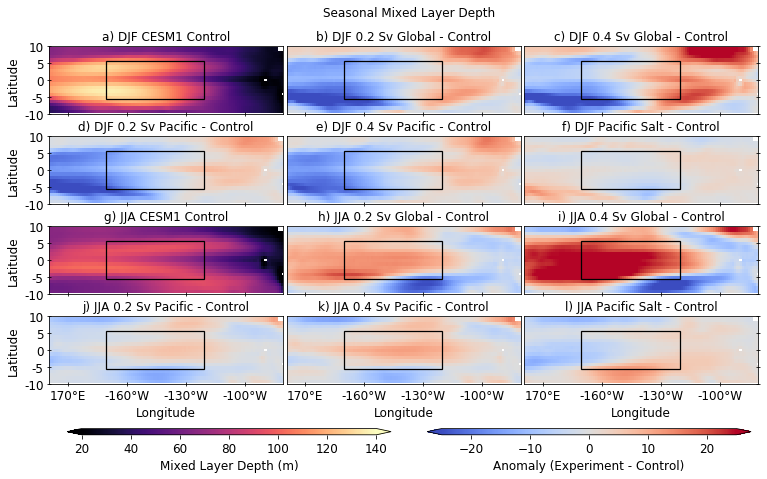

In [11]:
# -------------- create figure

a = u"\u00b0"

fig = plt.figure(figsize=(10,5))

fig.suptitle(u'Seasonal Mixed Layer Depth', x=0.5, y=1.05, fontsize=12)

# --------------

ax1 = plt.axes([0., 0.75, 0.325, 0.19])

ax1.set_title('a) DJF CESM1 Control', fontsize=12)

cs1 = ax1.pcolormesh(
                ds_cntrl_djf.coords['lon'].values, ds_cntrl_djf.coords['lat'].values,
                (ds_cntrl_djf * 0.01).values, 
                cmap='magma', vmin=20, vmax=140, shading='auto')

ax1.margins(x=0,y=0)

ax1.set_yticks([-10,-5,0,5,10])
ax1.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax1.set_xticks((ds_cntrl_djf.coords['lon'] - 0.5)[10::30])
ax1.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax1.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax1.add_patch(poly)

# --------------

ax2 = plt.axes([0.33, 0.75, 0.325, 0.19])

ax2.set_title('b) DJF 0.2 Sv Global - Control', fontsize=12)

cs2 = ax2.pcolormesh(
                ds_g02sv_djf.coords['lon'].values, ds_g02sv_djf.coords['lat'].values,
                (ds_g02sv_djf * 0.01).values - (ds_cntrl_djf * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax2.margins(x=0,y=0)

ax2.set_yticks([-10,-5,0,5,10])
ax2.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax2.set_xticks((ds_cntrl_djf.coords['lon'] - 0.5)[10::30])
ax2.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax2.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax2.add_patch(poly)

# --------------

ax3 = plt.axes([0.66, 0.75, 0.325, 0.19])

ax3.set_title('c) DJF 0.4 Sv Global - Control', fontsize=12)

ax3.pcolormesh(
                ds_g04sv_djf.coords['lon'].values, ds_g04sv_djf.coords['lat'].values,
                (ds_g04sv_djf * 0.01).values - (ds_cntrl_djf * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax3.margins(x=0,y=0)

ax3.set_yticks([-10,-5,0,5,10])
ax3.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax3.set_xticks((ds_cntrl_djf.coords['lon'] - 0.5)[10::30])
ax3.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax3.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax3.add_patch(poly)

# --------------

ax4 = plt.axes([0., 0.5, 0.325, 0.19])

ax4.set_title('d) DJF 0.2 Sv Pacific - Control', fontsize=12)

ax4.pcolormesh(
                ds_p02sv_djf.coords['lon'].values, ds_p02sv_djf.coords['lat'].values,
                (ds_p02sv_djf * 0.01).values - (ds_cntrl_djf * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax4.margins(x=0,y=0)

ax4.set_yticks([-10,-5,0,5,10])
ax4.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax4.set_xticks((ds_cntrl_djf.coords['lon'] - 0.5)[10::30])
ax4.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax4.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False,
                direction='inout', labelbottom=False, bottom=True)
ax4.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax4.add_patch(poly)

# --------------

ax5 = plt.axes([0.33, 0.5, 0.325, 0.19])

ax5.set_title('e) DJF 0.4 Sv Pacific - Control', fontsize=12)

ax5.pcolormesh(
                ds_p04sv_djf.coords['lon'].values, ds_p04sv_djf.coords['lat'].values,
                (ds_p04sv_djf * 0.01).values - (ds_cntrl_djf * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax5.margins(x=0,y=0)

ax5.set_yticks([-10,-5,0,5,10])
ax5.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax5.set_xticks((ds_cntrl_djf.coords['lon'] - 0.5)[10::30])
ax5.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax5.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax5.add_patch(poly)

# --------------

ax6 = plt.axes([0.66, 0.5, 0.325, 0.19])

ax6.set_title('f) DJF Pacific Salt - Control', fontsize=12)

ax6.pcolormesh(
                ds_psalt_djf.coords['lon'].values, ds_psalt_djf.coords['lat'].values,
                (ds_psalt_djf * 0.01).values - (ds_cntrl_djf * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax6.margins(x=0,y=0)

ax6.set_yticks([-10,-5,0,5,10])
ax6.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax6.set_xticks((ds_cntrl_djf.coords['lon'] - 0.5)[10::30])
ax6.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax6.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax6.add_patch(poly)

# --------------

ax7 = plt.axes([0., 0.25, 0.325, 0.19])

ax7.set_title('g) JJA CESM1 Control', fontsize=12)

ax7.pcolormesh(
                ds_cntrl_jja.coords['lon'].values, ds_cntrl_jja.coords['lat'].values,
                (ds_cntrl_jja * 0.01).values, 
                cmap='magma', vmin=20, vmax=140, shading='auto')

ax7.margins(x=0,y=0)

ax7.set_yticks([-10,-5,0,5,10])
ax7.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax7.set_xticks((ds_cntrl_jja.coords['lon'] - 0.5)[10::30])
ax7.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax7.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)
ax7.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax7.add_patch(poly)

# --------------

ax8 = plt.axes([0.33, 0.25, 0.325, 0.19])

ax8.set_title('h) JJA 0.2 Sv Global - Control', fontsize=12)

ax8.pcolormesh(
                ds_g02sv_jja.coords['lon'].values, ds_g02sv_jja.coords['lat'].values,
                (ds_g02sv_jja * 0.01).values - (ds_cntrl_jja * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax8.margins(x=0,y=0)

ax8.set_yticks([-10,-5,0,5,10])
ax8.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax8.set_xticks((ds_cntrl_jja.coords['lon'] - 0.5)[10::30])
ax8.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax8.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax8.add_patch(poly)

# --------------

ax9 = plt.axes([0.66, 0.25, 0.325, 0.19])

ax9.set_title('i) JJA 0.4 Sv Global - Control', fontsize=12)

ax9.pcolormesh(
                ds_g04sv_jja.coords['lon'].values, ds_g04sv_jja.coords['lat'].values,
                (ds_g04sv_jja * 0.01).values - (ds_cntrl_jja * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax9.margins(x=0,y=0)

ax9.set_yticks([-10,-5,0,5,10])
ax9.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax9.set_xticks((ds_cntrl_jja.coords['lon'] - 0.5)[10::30])
ax9.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax9.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax9.add_patch(poly)

# --------------

ax10 = plt.axes([0., 0., 0.325, 0.19])

ax10.set_title('j) JJA 0.2 Sv Pacific - Control', fontsize=12)

ax10.pcolormesh(
                ds_p02sv_jja.coords['lon'].values, ds_p02sv_jja.coords['lat'].values,
                (ds_p02sv_jja * 0.01).values - (ds_cntrl_jja * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax10.margins(x=0,y=0)

ax10.set_yticks([-10,-5,0,5,10])
ax10.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax10.set_xticks((ds_cntrl_jja.coords['lon'] - 0.5)[10::30])
ax10.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax10.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax10.set_xlabel(u'Longitude', fontsize=12)
ax10.set_ylabel('Latitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax10.add_patch(poly)

# --------------

ax11 = plt.axes([0.33, 0., 0.325, 0.19])

ax11.set_title('k) JJA 0.4 Sv Pacific - Control', fontsize=12)

ax11.pcolormesh(
                ds_p04sv_jja.coords['lon'].values, ds_p04sv_jja.coords['lat'].values,
                (ds_p04sv_jja * 0.01).values - (ds_cntrl_jja * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax11.margins(x=0,y=0)

ax11.set_yticks([-10,-5,0,5,10])
ax11.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax11.set_xticks((ds_cntrl_jja.coords['lon'] - 0.5)[10::30])
ax11.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax11.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax11.set_xlabel('Longitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax11.add_patch(poly)

# --------------

ax12 = plt.axes([0.66, 0., 0.325, 0.19])

ax12.set_title('l) JJA Pacific Salt - Control', fontsize=12)

ax12.pcolormesh(
                ds_psalt_jja.coords['lon'].values, ds_psalt_jja.coords['lat'].values,
                (ds_psalt_jja * 0.01).values - (ds_cntrl_jja * 0.01).values, 
                cmap='coolwarm', vmin=-25, vmax=25, shading='auto')

ax12.margins(x=0,y=0)

ax12.set_yticks([-10,-5,0,5,10])
ax12.set_yticklabels([-10,-5,0,5,10], fontsize=12)
ax12.set_xticks((ds_cntrl_jja.coords['lon'] - 0.5)[10::30])
ax12.set_xticklabels([r'170'+a+'E',r'-160'+a+'W',r'-130'+a+'W',r'-100'+a+'W'], fontsize=12)
ax12.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=False, 
                 direction='inout', labelbottom=True, bottom=True)
ax12.set_xlabel('Longitude', fontsize=12)

lat_corners = np.array([ -5.5, 5.5, 5.5, -5.5])
lon_corners = np.array([ -170.5+360, -170.5+360, -120.5+360, -120.5+360])
poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = lon_corners
poly_corners[:,1] = lat_corners
poly = mpatches.Polygon(poly_corners, closed=True, fill=False, ec='k', facecolor=None, lw=1.25, zorder=30)
ax12.add_patch(poly)

# --------------

cbar_ax = fig.add_axes([0.025, -0.14, 0.45, 0.0175])
ticks_1 = [20,40,60,80,100,120,140]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:],
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Mixed Layer Depth (m)', fontsize=12)

# --------------

cbar_ax = fig.add_axes([0.525, -0.14, 0.45, 0.0175])
ticks_1 = [-20,-10,0,10,20]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=ticks_1[:],
                    orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Anomaly (Experiment - Control)', fontsize=12)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig17.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig17.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------